# Megaline Calling Plans Analysis

## Introduction

A set of telecom company's users data have been provided for analysis of the users' behavior and the company's revenue. The dataset will be processed to avoid or minimise skewed analysis, exploratory data analysis will be conducted and hypotheses testing will be done in order to reach some conclusions. This report will consist of the following:

1. General information on the dataset
2. Data preprocessing stages, replacing missing values, categorising data and adding other relevant variables
3. Exploratory data analysis on the monthly plan usage and the company's revenue
4. Hypotheses testing to determine which monthly plan and other factors bring in more revenue

The main goal of this report is to provide Megaline's marketing department to make the decisions on which plan to advertise more. The conclusions drawn in this report will also provide suggestions on which strategy best serves Megaline.

## General Information and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import datetime
from math import factorial
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the .csv file

try:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
def data_info(data):
    """This function helps simplify reading multiple datasets.
    
    This function takes the dataset variable as input and 
    produces the general information about each dataset, 
    including description, duplicates and missing values."""
    print('General dataset information:')
    print(data.info())
    print()
    print('First five rows:')
    print(data.head())
    print()
    print('Description of the dataset:')
    print(data.describe())
    print()
    print('This dataset has {} duplicates.'.format(data.duplicated().sum()))
    print()
    print('How many missing values does this data have?')
    print(data.isna().sum())
    print()
    print('What is the percentage of the missing values?')
    print(data.isna().sum() / len(data))

### Preprocessing Calls Data 

In [4]:
data_info(calls)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

First five rows:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

Description of the dataset:
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       

The calls dataset does not have any missing values or duplicates. But we should check the columns for any anomaly, such as calls with 0 minutes duration.

In [14]:
calls.loc[calls['duration'] == 0].head()

,id,user_id,call_date,duration,month,duration_min
19,1001_4,1001,2018-12-05,0.0,12,0.0
25,1001_13,1001,2018-12-24,0.0,12,0.0
31,1001_30,1001,2018-10-17,0.0,10,0.0
32,1001_31,1001,2018-11-03,0.0,11,0.0
34,1001_35,1001,2018-12-21,0.0,12,0.0


In [15]:
#check the percentage of zero values in the dataset
print('Percentage of calls with zero minutes is: {:.2%}'.format(len(calls.loc[calls['duration'] == 0]) / len(calls)))

Percentage of calls with zero minutes is: 19.48%


A zero duration calls can be due to technical error or it can be a missed calls and calls with duration less than 1 minute. It's quite a big amount, nearly 20%. To avoid skewing the analysis, we don't replace these zero values.

In [7]:
# change the date format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [8]:
# add month for analysis about monthly usage
calls['month'] = calls['call_date'].dt.month

In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


In [11]:
# add rounded up duration for analysis
calls['duration_min'] = calls['duration'].apply(np.ceil)

In [12]:
calls.head()

,id,user_id,call_date,duration,month,duration_min
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


### Preprocessing Internet Data

In [9]:
data_info(internet)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

First five rows:
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

Description of the dataset:
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000

This dat

The internet dataset does not have any missing values or duplicates. Again we should check the columns for any anomaly, such as internet session with 0 MB data.

In [16]:
internet.loc[internet['mb_used'] == 0].head()

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0


In [17]:
#check the percentage of zero values in the dataset
print('Percentage of 0 MB session is: {:.2%}'.format(len(internet.loc[internet['mb_used'] == 0]) / len(internet)))

Percentage of 0 MB session is: 13.11%


There's more than 13% of internet sessions that have 0 MB data. Those might be attempts to access the internet but the connection wasn't good so it didn't load. To avoid skewing the analysis, we don't replace those zero values.

In [18]:
# change the date format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [19]:
# add month for analysis about monthly usage
internet['month'] = internet['session_date'].dt.month

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


### Preprocessing Messages Data

In [13]:
data_info(messages)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

First five rows:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

Description of the dataset:
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000

This dataset has 0 duplicates.

How many missing values does this data have?
id              0
user_id         0
message_date    0
dtype: int64

What is the percentage of the missing values?
id              0.0
user_id         0.0
message_date    0.0
dtype: float

The message dataset does not have any missing values or duplicates. We need to change the data type of the date.

In [22]:
# change the date format
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [23]:
# add month for analysis about monthly usage
messages['month'] = messages['message_date'].dt.month
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


### Preprocessing Users Data

In [16]:
data_info(users)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

First five rows:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  201

The users dataset does not have duplicates, but it has around 9% of missing values in the churn dataset. It might be the users that are still using the service. So, we will leave it be, and change the data type of columns that need changing and add relevant columns.

In [24]:
# change the date format
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [32]:
# group the age column
bins = [17, 30, 45, 60, 76]
labels = ['18-30', '31-45', '46-60', 'above 60']

users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels)

In [33]:
users['age_group'].value_counts()

18-30       132
46-60       126
above 60    126
31-45       116
Name: age_group, dtype: int64

In [34]:
grouped_users = users[['user_id', 'age_group', 'plan', 'city']]
grouped_users.head()

,user_id,age_group,plan,city
0,1000,31-45,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,18-30,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,31-45,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,46-60,surf,"Tulsa, OK MSA"
4,1004,31-45,surf,"Seattle-Tacoma-Bellevue, WA MSA"


### Preprocessing Plans Data

In [20]:
data_info(plans)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

First five rows:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Description of 

### Conclusion

1. All dataset have no missing values, except churn_date in users. Those are active users at the time of data retrieval.
2. The calls dataset have a lot of 0 minutes duration calls, nearly 20%. Those might be missed calls. To avoid skewing the analysis, we don't replace those zero values.
3. The internet dataset also have a lor of 0 MB internet sessions, around 13%. Those might be attempts to access the internet but the connection wasn't good. To avoid skewing the analysis, we don't replace those zero values.
4. On users dataset, we group the users on age groups. 
5. For further analysis, the date is converted into datetime format and we add month column to calls, messages and internet dataset. 

## Exploratory Data Analysis

In this section, we would analyse the following:
1. The number of calls made and minutes used per month
2. The number of text messages sent per month
3. The volume of data per month
4. The monthly revenue from each user

### Calls Analysis

In [36]:
# group each user's calls usage by month

monthly_calls = (calls
              .groupby(['user_id', 'month'])
              .aggregate({'duration_min' : ['count','sum']})
             ).reset_index()
monthly_calls.columns = ['user_id', 'month', 'number_of_calls', 'total_duration']

monthly_calls.head()

,user_id,month,number_of_calls,total_duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


In [37]:
monthly_calls[['number_of_calls', 'total_duration']].describe()

,number_of_calls,total_duration
count,2258.000000,2258.000000
mean,60.998671,435.937555
std,31.770869,231.972343
min,1.000000,0.000000
25%,39.000000,275.000000
50%,60.000000,429.000000
75%,80.000000,574.750000
max,205.000000,1510.000000


The average and median shows that most users spend 429-435 minutes on calls each month, which is still within the surf plan limit and well under the ultimate plan limit. The maximum any user has spent on calls in a single month in 1510 minutes, which is well over the surf plan but still within the ultimate plan limit. 

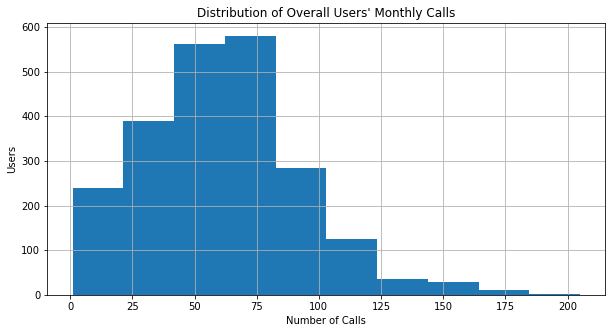

In [38]:
monthly_calls['number_of_calls'].hist(bins=10, figsize=(10,5))
plt.title("Distribution of Overall Users' Monthly Calls")
plt.xlabel('Number of Calls')
plt.ylabel('Users');

In the histogram, we can see that most users have between 50-75 calls per month. Not many users have more than 125 calls per month.

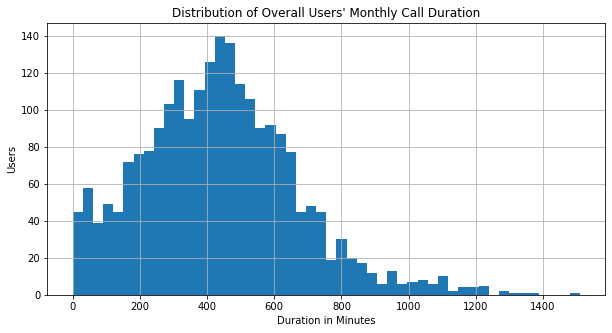

In [40]:
monthly_calls['total_duration'].hist(bins=50, figsize=(10,5))
plt.title("Distribution of Overall Users' Monthly Call Duration")
plt.xlabel('Duration in Minutes')
plt.ylabel('Users');

We can see on the graph that there is a peak around 420 minutes per user per month. There aren't many users who spends more than 800 minutes on call per month. To check the outliers we will plot the duration on a boxplot.

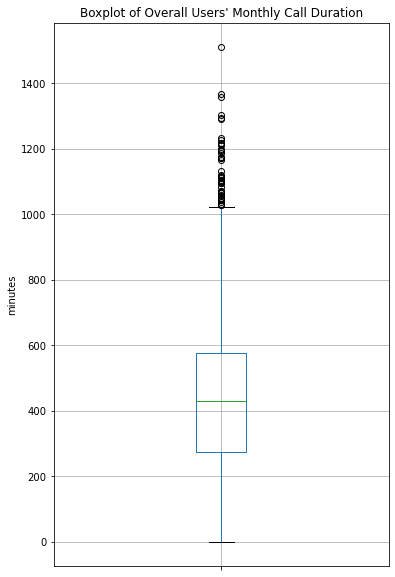

In [41]:
monthly_calls['total_duration'].plot(kind='box', figsize=(6,10), grid=True)
plt.title("Boxplot of Overall Users' Monthly Call Duration")
plt.xticks([1], [])
plt.ylabel('minutes');

When we look at the boxplot, call duration above 1000 minutes per month are outliers. The IQR is around 220-590 minutes per user per month.

### Messages Analysis

In [42]:
#group messages usage by month

monthly_text = (messages
              .groupby(['user_id', 'month'])
              .aggregate({'id' : 'count'})
             ).reset_index()
monthly_text.columns = ['user_id', 'month', 'total_messages']

monthly_text.head()

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [43]:
monthly_text['total_messages'].describe()

count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: total_messages, dtype: float64

The average user sends 42 text messages each month. The maximum amount of messages a user sends a month is 266 messages, which is around 8-9 messages per day in a given month. That is also only slightly over 25% of total ultimate plan limit.

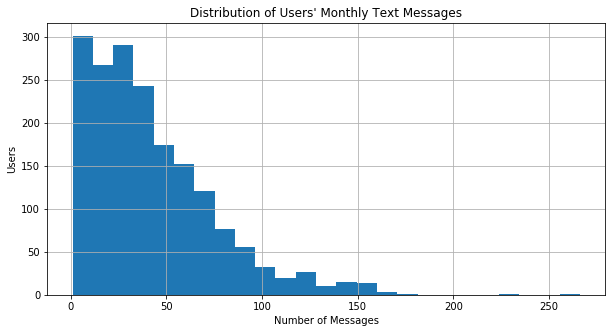

In [29]:
monthly_text['total_messages'].hist(bins=25, figsize=(10, 5))
plt.title("Distribution of Users' Monthly Text Messages")
plt.xlabel('Number of Messages')
plt.ylabel('Users');

The data is very positively skewed, as shown in the histogram. There is a steep decline after 40 messages, which reflects the description above.

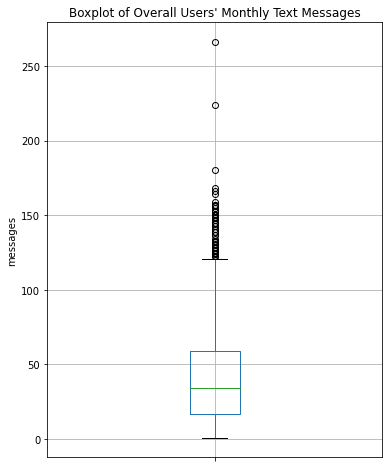

In [44]:
monthly_text['total_messages'].plot(kind='box', figsize=(6,8), grid=True)
plt.title("Boxplot of Overall Users' Monthly Text Messages")
plt.xticks([1], [])
plt.ylabel('messages');

The IQR is within 17-59 messages per month, and there are many outliers above 120 messages. It is still under the surf plan limit, and well under the ultimate plan limit of 1000 text messages.

### Internet Analysis

In [45]:
#group internet usage by month

monthly_internet = (internet
                    .groupby(['user_id', 'month'])
                    .aggregate({'mb_used' : lambda x: np.ceil(sum(x)/1024)})
                   ).reset_index()
monthly_internet.columns = ['user_id','month','gb_used']

monthly_internet.head()

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


In [33]:
monthly_internet['gb_used'].describe()

count    2277.000000
mean       16.989021
std         7.693683
min         1.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64

The average user spends nearly 17GB each month, which means it's over the surf plan limit, and Megaline most likely profits from the internet usage.

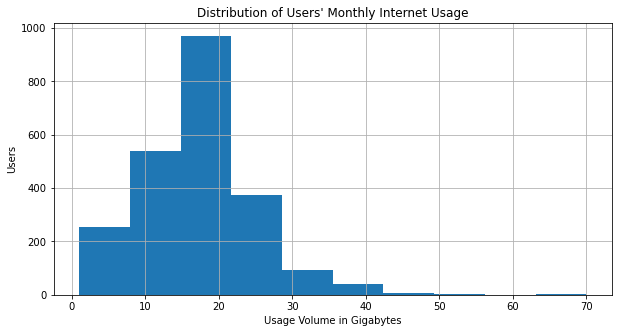

In [46]:
monthly_internet['gb_used'].hist(bins=10, figsize=(10, 5))
plt.title("Distribution of Users' Monthly Internet Usage")
plt.xlabel('Usage Volume in Gigabytes')
plt.ylabel('Users');

We can see clearly in the histogram that there is a significant peak between 10-20 GB. There's not many users who use more than 35GB each month.

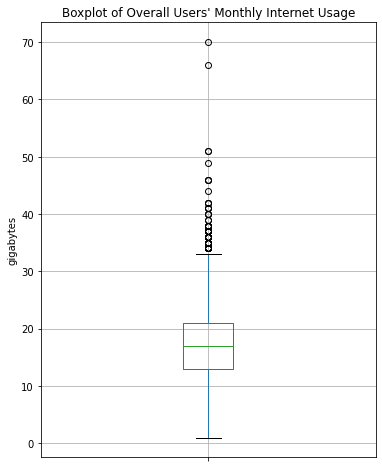

In [47]:
monthly_internet['gb_used'].plot(kind='box', figsize=(6,8), grid=True)
plt.title("Boxplot of Overall Users' Monthly Internet Usage")
plt.xticks([1], [])
plt.ylabel('gigabytes');

The boxplot shows that most users use around 30GB per month and there are many outliers in the data. The biggest internet usage is an outlier of 70GB, more than twice the limit of the ultimate plan. The third quartile shows 21GB, which is still within the ultimate plan limit of 30GB a month.

### Overall Revenue Analysis

In this section, we will analyse the revenue of Megaline, based on the monthly base subscription fee and excess fee charges. We will separate the users based on the plans that they use.

In [48]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [50]:
#separate users by their plan
surf_users = grouped_users.query('plan == "surf"')['user_id']
ultimate_users = grouped_users.query('plan == "ultimate"')['user_id']

#### Calls

In [51]:
# calculate the number of users exceeding their call limit
def excess_calls(row):
    """This function calculates the excess usage of calls dataset.
    
    This function takes the row of a specific column in the dataset 
    and produces the excess amount in the newly created column."""
    if row['user_id'] in surf_users.values:
        if row['total_duration'] <= 500:
            return 0
        else:
            excess = row['total_duration'] - 500
            return excess
    else:
        if row['total_duration'] <= 3000:
            return 0
        else:
            excess = row['total_duration'] - 3000
            return excess
            
monthly_calls['excess_minutes'] = monthly_calls.apply(excess_calls,axis=1)

In [53]:
# calculate the revenue from calls
def calls_revenue(row):
    """This function calculates the revenue from users' calls usage.
    
    This function takes the excess usage of each user 
    and produces the total revenue in the newly created column."""
    if row['user_id'] in surf_users.values:
        if row['excess_minutes'] == 0:
            return 0
        else:
            revenue = row['excess_minutes'] * 0.03
            return revenue
    else:
        if row['excess_minutes'] == 0:
            return 0
        else:
            revenue = row['excess_minutes'] * 0.01
            return revenue
            
monthly_calls['calls_revenue'] = monthly_calls.apply(calls_revenue,axis=1)

In [54]:
monthly_calls.loc[monthly_calls['excess_minutes'] > 0].head()

,user_id,month,number_of_calls,total_duration,excess_minutes,calls_revenue
9,1003,12,149,1104.0,604.0,18.12
23,1007,10,80,645.0,145.0,4.35
24,1007,11,80,524.0,24.0,0.72
25,1007,12,87,617.0,117.0,3.51
29,1009,5,71,534.0,34.0,1.02


#### Messages

In [56]:
# calculate the number of users exceeding their messages limit
def excess_text(row):
    """This function calculates the excess usage of messages dataset.
    
    This function takes the row of a specific column in the dataset 
    and produces the excess amount in the newly created column."""
    if row['user_id'] in surf_users.values:
        if row['total_messages'] <= 50:
            return 0
        else:
            excess = row['total_messages'] - 50
            return excess
    else:
        if row['total_messages'] <= 1000:
            return 0
        else:
            excess = row['total_messages'] - 1000
            return excess
            
monthly_text['excess_messages'] = monthly_text.apply(excess_text,axis=1)

In [57]:
# calculate the revenue from messages
def text_revenue(row):
    """This function calculates the revenue from users' messages usage.
    
    This function takes the excess usage of each user 
    and produces the total revenue in the newly created column."""
    if row['user_id'] in surf_users.values:
        if row['excess_messages'] == 0:
            return 0
        else:
            revenue = row['excess_messages'] * 0.03
            return revenue
    else:
        if row['excess_messages'] == 0:
            return 0
        else:
            revenue = row['excess_messages'] * 0.01
            return revenue
            
monthly_text['messages_revenue'] = monthly_text.apply(text_revenue,axis=1)

In [58]:
monthly_text.loc[monthly_text['excess_messages'] > 0].head()

,user_id,month,total_messages,excess_messages,messages_revenue
3,1001,10,53,3,0.09
21,1007,8,51,1,0.03
23,1007,10,59,9,0.27
38,1014,12,64,14,0.42
39,1015,12,68,18,0.54


#### Internet

In [59]:
# calculate the number of users exceeding their internet usage limit
def excess_gb(row):
    """This function calculates the excess usage of internet dataset.
    
    This function takes the row of a specific column in the dataset 
    and produces the excess amount in the newly created column."""
    if row['user_id'] in surf_users.values:
        if row['gb_used'] <= 15:
            return 0
        else:
            excess = row['gb_used'] - 15
            return excess
    else:
        if row['gb_used'] <= 30:
            return 0
        else:
            excess = row['gb_used'] - 30
            return excess
            
monthly_internet['excess_gb'] = monthly_internet.apply(excess_gb,axis=1)

In [60]:
# calculate the revenue from internet
def internet_revenue(row):
    """This function calculates the revenue from users' internet usage.
    
    This function takes the excess usage of each user 
    and produces the total revenue in the newly created column."""
    if row['user_id'] in surf_users.values:
        if row['excess_gb'] == 0:
            return 0
        else:
            revenue = row['excess_gb'] * 10
            return revenue
    else:
        if row['excess_gb'] == 0:
            return 0
        else:
            revenue = row['excess_gb'] * 7
            return revenue
            
monthly_internet['internet_revenue'] = monthly_internet.apply(internet_revenue,axis=1)

In [61]:
monthly_internet.loc[monthly_internet['excess_gb'] > 0].head()

,user_id,month,gb_used,excess_gb,internet_revenue
3,1001,10,22.0,7.0,70.0
4,1001,11,19.0,4.0,40.0
5,1001,12,19.0,4.0,40.0
7,1002,11,19.0,4.0,40.0
9,1003,12,27.0,12.0,120.0


#### Total Excess Usage Per User

We will now create a specific revenue table to see users' usage behaviour. We merge the calls, text and internet usage columns together. Merging the dataset allows us to look at the bigger picture of overall users' monthly plan usage behaviour and revenue, we will later separate revenue by each plan for further analysis.

In [62]:
# merge the excess usage and monthly revenue from all services
revenue = (monthly_calls
           .merge(monthly_text, on = ['user_id', 'month'], how = 'outer')
           .merge(monthly_internet, on = ['user_id', 'month'], how = 'outer')
          )

revenue.head()

,user_id,month,number_of_calls,total_duration,excess_minutes,calls_revenue,total_messages,excess_messages,messages_revenue,gb_used,excess_gb,internet_revenue
0,1000,12,16.0,124.0,0.0,0.0,11.0,0.0,0.00,2.0,0.0,0.0
1,1001,8,27.0,182.0,0.0,0.0,30.0,0.0,0.00,7.0,0.0,0.0
2,1001,9,49.0,315.0,0.0,0.0,44.0,0.0,0.00,14.0,0.0,0.0
3,1001,10,65.0,393.0,0.0,0.0,53.0,3.0,0.09,22.0,7.0,70.0
4,1001,11,64.0,426.0,0.0,0.0,36.0,0.0,0.00,19.0,4.0,40.0


The missing value in this merged dataset happens because the user hasn't used that particular service in that month but has used other services. Therefore we can replace the NaN value with 0 for easy calculation.

In [63]:
# fill in the missing values in revenue data
revenue = revenue.fillna(0)
revenue.isna().sum()

user_id             0
month               0
number_of_calls     0
total_duration      0
excess_minutes      0
calls_revenue       0
total_messages      0
excess_messages     0
messages_revenue    0
gb_used             0
excess_gb           0
internet_revenue    0
dtype: int64

In [64]:
# calculate total revenue and store them in a new column
def total_revenue(row):
    if row['user_id'] in surf_users.values:
        total_revenue = 20 + row['calls_revenue'] + row['messages_revenue'] + row['internet_revenue']
        return total_revenue
    else: 
        total_revenue = 70 + row['calls_revenue'] + row['messages_revenue'] + row['internet_revenue']
        return total_revenue
    
revenue['total_revenue'] = revenue.apply(total_revenue, axis=1)

revenue.head()

,user_id,month,number_of_calls,total_duration,excess_minutes,calls_revenue,total_messages,excess_messages,messages_revenue,gb_used,excess_gb,internet_revenue,total_revenue
0,1000,12,16.0,124.0,0.0,0.0,11.0,0.0,0.00,2.0,0.0,0.0,70.00
1,1001,8,27.0,182.0,0.0,0.0,30.0,0.0,0.00,7.0,0.0,0.0,20.00
2,1001,9,49.0,315.0,0.0,0.0,44.0,0.0,0.00,14.0,0.0,0.0,20.00
3,1001,10,65.0,393.0,0.0,0.0,53.0,3.0,0.09,22.0,7.0,70.0,90.09
4,1001,11,64.0,426.0,0.0,0.0,36.0,0.0,0.00,19.0,4.0,40.0,60.00


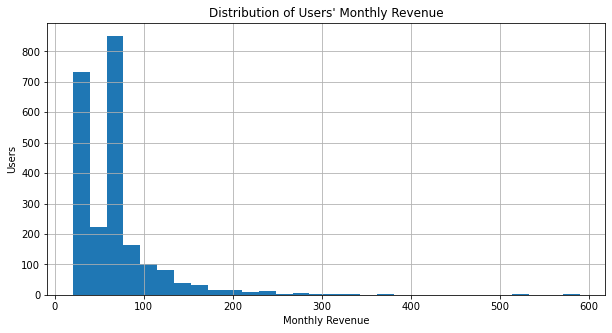

In [65]:
revenue['total_revenue'].hist(bins=30, figsize=(10, 5))
plt.title("Distribution of Users' Monthly Revenue")
plt.xlabel('Monthly Revenue')
plt.ylabel('Users');

Based on the histogram, we can see that:
- most users pay the standard plan package of USD20 for Surf plan and USD70 for Ultimate plan.
- even though there are more Surf users than Ultimate users, there are more people paying USD70 than USD20, which means most of Surf users exceed their plan limit and have to pay excess fees.

### Each Plan's Revenue Analysis

In [68]:
# separate revenue by each plan for analysis  
surf_revenue = revenue.query('user_id in @surf_users.values')
ultimate_revenue = revenue.query('user_id in @ultimate_users.values')

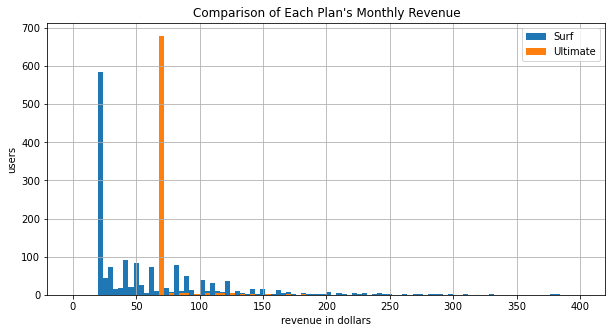

In [74]:
# compare each plan's revenue
surf_revenue['total_revenue'].hist(bins=100, figsize=(10,5), range=(0,400), label='Surf')
ultimate_revenue['total_revenue'].hist(bins=100, figsize=(10,5), range=(0,400), label='Ultimate')
plt.title("Comparison of Each Plan's Monthly Revenue")
plt.xlabel('revenue in dollars')
plt.ylabel('users')
plt.legend();

From the histogram, it looks like a lot of Surf users are not exceeding their plan limit and only paying USD20 per month. The same goes for Ultimate users who are only paying the base subscription fee of USD70.

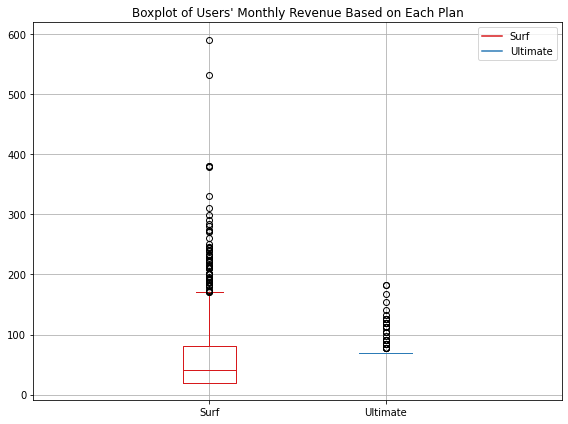

In [96]:
data_a = surf_revenue['total_revenue']
data_b = ultimate_revenue['total_revenue']

ticks = ['Surf', 'Ultimate']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(8,6))

bpl = plt.boxplot(data_a, positions=[0], widths = 0.6)
bpr = plt.boxplot(data_b, positions=[2], widths = 0.6)
set_box_color(bpl, '#D7191C')
set_box_color(bpr, '#2C7BB6')

plt.plot([], c='#D7191C', label='Surf')
plt.plot([], c='#2C7BB6', label='Ultimate')
plt.legend()

plt.title("Boxplot of Users' Monthly Revenue Based on Each Plan")
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.grid()
plt.tight_layout();

When we look closer at the boxplot, the third quartile is located nearly USD100 per month and the upper whisker goes up to nearly USD200 per month. This shows that a lot of Surf users exceed the plan limits. Meanwhile, Ultimate users very rarely exceed their plan limit, which is reflected as well in the boxplot where the IQR is very tight with only a few outliers up to USD180.

In [78]:
print('The percentage of surf plan users who exceeds their plan limit is {:.2%}'.format(len(surf_revenue.query('total_revenue > 20')) / len(surf_revenue)))
print('The percentage of surf plan users who incurs excess usage fee more than $70 is {:.2%}'.format(len(surf_revenue.query('total_revenue > 70')) / len(surf_revenue)))

The percentage of surf plan users who exceeds their plan limit is 72.60%
The percentage of surf plan users who incurs excess usage fee more than $70 is 31.15%


We can see on the numbers above, 72.6% of total Surf users are exceeding their plan limit, and more than 30% are incurring fee of more than USD70. These users might as well get the Ultimate plan.

## Comparison between Each Plans' Service Usage

In [82]:
def usage_info(df):
    """This function creates a pivot table for each plan's usage.
    
    This function takes the relevant dataset as variable 
    and produces a new table with specific columns."""
    new_df = df.pivot_table(
        index='user_id', 
        values=['total_duration', 'total_messages', 'gb_used', 'total_revenue'], 
        aggfunc='median').reset_index()
    
    return new_df

In [88]:
usage_surf = usage_info(surf_revenue)
usage_ultimate = usage_info(ultimate_revenue)
usage_all = usage_info(revenue)

In [89]:
usage_surf.head()

,user_id,gb_used,total_duration,total_messages,total_revenue
0,1001,19.0,393.0,44.0,60.00
1,1002,15.0,384.0,32.0,20.00
2,1003,27.0,1104.0,50.0,158.12
3,1004,21.0,359.5,24.5,80.00
4,1005,17.0,496.0,11.0,40.00


In [90]:
usage_ultimate.head()

,user_id,gb_used,total_duration,total_messages,total_revenue
0,1000,2.0,124.0,11.0,70.0
1,1006,17.5,34.5,77.0,77.0
2,1008,17.0,476.0,26.0,70.0
3,1011,21.0,486.0,58.0,70.0
4,1013,20.0,219.0,16.0,70.0


In [92]:
usage_all.head()

,user_id,gb_used,total_duration,total_messages,total_revenue
0,1000,2.0,124.0,11.0,70.00
1,1001,19.0,393.0,44.0,60.00
2,1002,15.0,384.0,32.0,20.00
3,1003,27.0,1104.0,50.0,158.12
4,1004,21.0,359.5,24.5,80.00


In [93]:
# add users info to the usage tables
usage_surf = usage_surf.merge(grouped_users, how='left', on='user_id')
usage_ultimate = usage_ultimate.merge(grouped_users, how='left', on='user_id')
usage_all = usage_all.merge(grouped_users, how='left', on='user_id')

### Monthly Calls Comparison

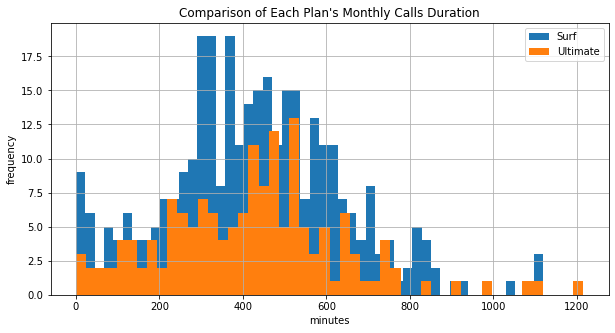

In [99]:
#calls usage comparison between each plan
usage_surf['total_duration'].hist(bins=50, figsize=(10,5), label='Surf')
usage_ultimate['total_duration'].hist(bins=50, figsize=(10,5), label='Ultimate')
plt.title("Comparison of Each Plan's Monthly Calls Duration")
plt.xlabel('minutes')
plt.ylabel('frequency')
plt.legend();

From the histogram, we can see how Surf plan users monthly calls duration compared to Ultimate plan users. Surf plan users graph peaks at around 300 minutes while Ultimate users graph peaks at 500 minutes.

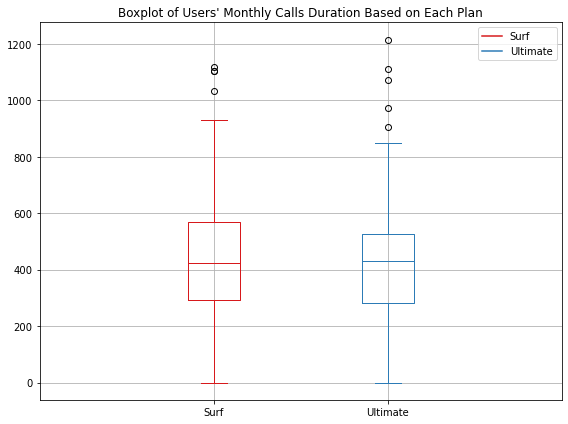

In [100]:
data_a = usage_surf['total_duration']
data_b = usage_ultimate['total_duration']

ticks = ['Surf', 'Ultimate']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(8,6))

bpl = plt.boxplot(data_a, positions=[0], widths = 0.6)
bpr = plt.boxplot(data_b, positions=[2], widths = 0.6)
set_box_color(bpl, '#D7191C')
set_box_color(bpr, '#2C7BB6')

plt.plot([], c='#D7191C', label='Surf')
plt.plot([], c='#2C7BB6', label='Ultimate')
plt.legend()

plt.title("Boxplot of Users' Monthly Calls Duration Based on Each Plan")
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.grid()
plt.tight_layout();

The boxplots show that the median of the two plans are similar, near 400 minutes. Surf plan users have bigger distance from median to the top of third quartile as well as upper whisker than Ultimate plan users. The Ultimate plan users also have more outliers with the longest duration of calls in a given month is above 1200 minutes.

In [56]:
print("Surf plan's average monthly calls duration is: {:.0f} minutes".format(usage_surf['total_duration'].mean()))
print("Surf plan's median monthly calls duration is: {:.0f} minutes".format(usage_surf['total_duration'].median()))
print("Surf plan's standard deviation of monthly calls duration is: {:.0f} minutes".format(usage_surf['total_duration'].std()))
print()
print("Ultimate plan's average monthly calls duration is: {:.0f} minutes".format(usage_ultimate['total_duration'].mean()))
print("Ultimate plan's median monthly calls duration is: {:.0f} minutes".format(usage_ultimate['total_duration'].median()))
print("Ultimate plan's standard deviation of monthly calls duration is: {:.0f} minutes".format(usage_ultimate['total_duration'].std()))

Surf plan's average monthly calls duration is: 429 minutes
Surf plan's median monthly calls duration is: 423 minutes
Surf plan's standard deviation of monthly calls duration is: 211 minutes

Ultimate plan's average monthly calls duration is: 423 minutes
Ultimate plan's median monthly calls duration is: 430 minutes
Ultimate plan's standard deviation of monthly calls duration is: 216 minutes


Both plans have pretty similar mean, median (around 420-430 minutes) and standard deviation (210-220 minutes), which is a sign of the distribution that is close to normal.

In [57]:
surf_excess = monthly_calls.query('(user_id in @surf_users.values) and (excess_minutes > 500)')
print('{:.2%} of surf plan users have more than 500 excess minutes, that is 10x the call duration limit of surf plan.'
      .format(len(surf_excess) / len(surf_users)))

10.03% of surf plan users have more than 500 excess minutes, that is 10x the call duration limit of surf plan.


### Monthly Text Comparison

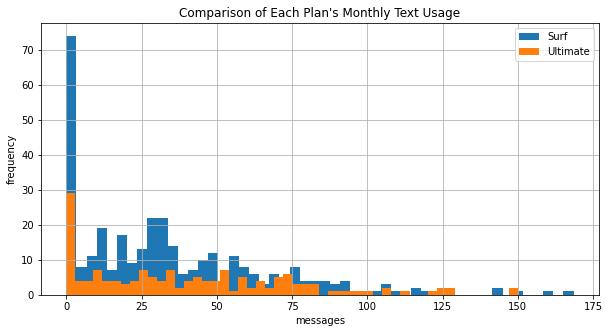

In [102]:
# text usage comparison between each plan
usage_surf['total_messages'].hist(bins=50, figsize=(10,5), label='Surf')
usage_ultimate['total_messages'].hist(bins=50, figsize=(10,5), label='Ultimate')
plt.title("Comparison of Each Plan's Monthly Text Usage")
plt.xlabel('messages')
plt.ylabel('frequency')
plt.legend();

By looking at the histogram, we could see the text usage behaviour between users of the two plans are quite similar, they peak very close to zero before showing quite a stable pattern with some random peaks. In the surf plan, there is a small peaks between 10-25 messages.

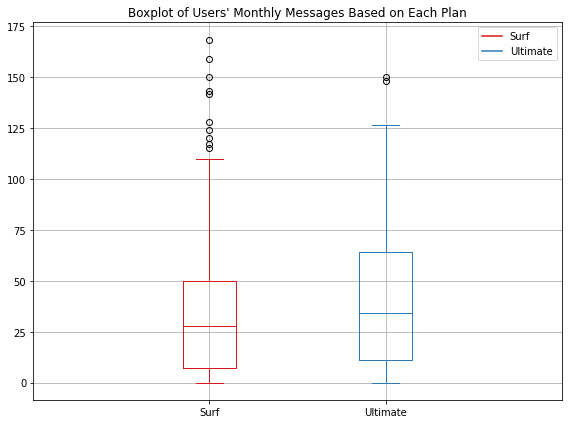

In [98]:
data_a = usage_surf['total_messages']
data_b = usage_ultimate['total_messages']

ticks = ['Surf', 'Ultimate']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(8,6))

bpl = plt.boxplot(data_a, positions=[0], widths = 0.6)
bpr = plt.boxplot(data_b, positions=[2], widths = 0.6)
set_box_color(bpl, '#D7191C')
set_box_color(bpr, '#2C7BB6')

plt.plot([], c='#D7191C', label='Surf')
plt.plot([], c='#2C7BB6', label='Ultimate')
plt.legend()

plt.title("Boxplot of Users' Monthly Messages Based on Each Plan")
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.grid()
plt.tight_layout();

When we look at the boxplot, the IQR of both plans are located on similar area. For Ultimate plan users, the distance between the median and the top of the third quartile are longer, it has longer upper whisker and very rare outliers. While surf plan users have more outliers slightly above 110 up to 170 messages.

In [60]:
print("Surf plan's average monthly text usage is: {:.0f} messages".format(usage_surf['total_messages'].mean()))
print("Surf plan's median monthly text usage is: {:.0f} messages".format(usage_surf['total_messages'].median()))
print("Surf plan's standard deviation of monthly text usage is: {:.0f} messages".format(usage_surf['total_messages'].std()))
print()
print("Ultimate plan's average monthly text usage is: {:.0f} messages".format(usage_ultimate['total_messages'].mean()))
print("Ultimate plan's median monthly text usage is: {:.0f} messages".format(usage_ultimate['total_messages'].median()))
print("Ultimate plan's standard deviation of monthly text usage is: {:.0f} messages".format(usage_ultimate['total_messages'].std()))

Surf plan's average monthly text usage is: 34 messages
Surf plan's median monthly text usage is: 28 messages
Surf plan's standard deviation of monthly text usage is: 33 messages

Ultimate plan's average monthly text usage is: 40 messages
Ultimate plan's median monthly text usage is: 34 messages
Ultimate plan's standard deviation of monthly text usage is: 35 messages


The standard deviation of both plans are similar at 33-35 messages, that means the data has normal distribution.

In [61]:
surf_text_excess = monthly_text.query('(user_id in @surf_users.values) and (excess_messages > 50)')
print('{:.2%} of surf plan users have more than 50 excess messages, which is 2x the surf plan messages limit.'.format(len(surf_text_excess) / len(surf_users)))

20.35% of surf plan users have more than 50 excess messages, which is 2x the surf plan messages limit.


### Monthly Internet Comparison

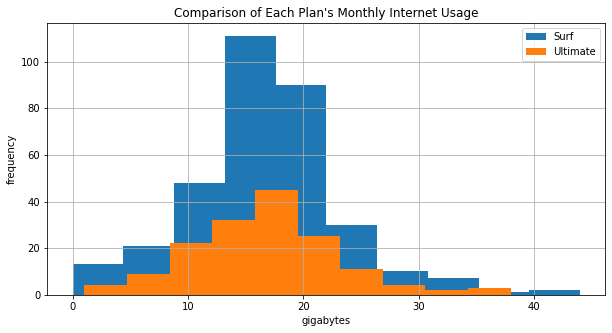

In [103]:
# internet usage comparison between each plan
usage_surf['gb_used'].hist(bins=10, figsize=(10,5), label='Surf')
usage_ultimate['gb_used'].hist(bins=10, figsize=(10,5), label='Ultimate')
plt.title("Comparison of Each Plan's Monthly Internet Usage")
plt.xlabel('gigabytes')
plt.ylabel('frequency')
plt.legend();

The histogram shows similar pattern for both plans, where they peak at around 15-18GB. After 20 GB, both shows a significant decrease in distribution.

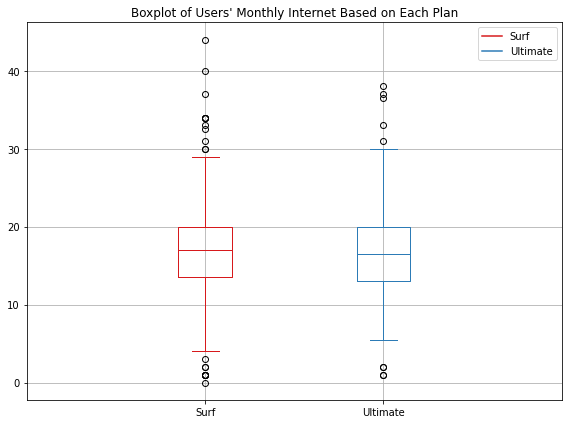

In [104]:
data_a = usage_surf['gb_used']
data_b = usage_ultimate['gb_used']

ticks = ['Surf', 'Ultimate']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(8,6))

bpl = plt.boxplot(data_a, positions=[0], widths = 0.6)
bpr = plt.boxplot(data_b, positions=[2], widths = 0.6)
set_box_color(bpl, '#D7191C')
set_box_color(bpr, '#2C7BB6')

plt.plot([], c='#D7191C', label='Surf')
plt.plot([], c='#2C7BB6', label='Ultimate')
plt.legend()

plt.title("Boxplot of Users' Monthly Internet Based on Each Plan")
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.grid()
plt.tight_layout();

The boxplots also show pretty similar length of box and whiskers for both plans, Surf plan users have more outliers and the biggest outlier is above 40GB per month.

In [64]:
print("Surf plan's average monthly internet usage is: {:.0f} GB".format(usage_surf['gb_used'].mean()))
print("Surf plan's median monthly internet usage is: {:.0f} GB".format(usage_surf['gb_used'].median()))
print("Surf plan's standard deviation of monthly internet usage is: {:.0f} GB".format(usage_surf['gb_used'].std()))
print()
print("Ultimate plan's average monthly internet usage is: {:.0f} GB".format(usage_ultimate['gb_used'].mean()))
print("Ultimate plan's median monthly internet usage is: {:.0f} GB".format(usage_ultimate['gb_used'].median()))
print("Ultimate plan's standard deviation of monthly internet usage is: {:.0f} GB".format(usage_ultimate['gb_used'].std()))

Surf plan's average monthly internet usage is: 17 GB
Surf plan's median monthly internet usage is: 17 GB
Surf plan's standard deviation of monthly internet usage is: 6 GB

Ultimate plan's average monthly internet usage is: 17 GB
Ultimate plan's median monthly internet usage is: 16 GB
Ultimate plan's standard deviation of monthly internet usage is: 6 GB


The measures of location and dispersion are almost identical for both Surf and Ultimate plans. The mean and median are very close (around 16-17GB per month) that shows normal distribution, along with smaller standard deviation number of 6GB.

In [65]:
surf_internet_excess = monthly_internet.query('(user_id in @surf_users.values) and (excess_gb > 15)')
print('{:.2%} of surf plan users have more than 15GB excess internet usage, which makes them exceed the ultimate plan limit or 2x the surf plan limit.'.format(len(surf_internet_excess) / len(surf_users)))

18.88% of surf plan users have more than 15GB excess internet usage, which makes them exceed the ultimate plan limit or 2x the surf plan limit.


### Conclusion

1. As expected before, the surf plan users exceeding their plan limit is very high.
2. On all services, the surf plan users exceed at least twice the limit of surf plan. 
3. On calls usage, 10% of them exceeds 10x the surf plan limit.
4. 30% of all surf plan users pay USD70 in excess fee, they might as well take the ultimate plan.
5. But this may be good for Megaline to keep them in surf plan to receive more profit. To understand more about this, we will test in the hypotheses testing section.
6. With all that was mentioned above, the users on both plans actually have a pretty similar usage behaviour. 

## Hypotheses Testing

In this section, we will test the following hypotheses:

- The average profit from users of Ultimate and Surf calling plans differs;
- The average profit from users in NY-NJ area is different from that of the users from other regions.

Both tests will be two sided, and the alpha value for the hypothesis testing will be 0.05.

### Difference Between Ultimate/Surf Plans Users

1. Null and Alternative Hypotheses

H0: The means of two statistical populations are equal. In this case it means that the average profit from users of surf and ultimate plans are the same.

H1: The means of two statistical populations are not equal. In our case it means that the average profit from users of surf and ultimate plans are different.

2. Criteria for a decision (alpha value)

In behavioral science, the level of significance is typically set at 5% and we will choose this criteria as well. When the probability of obtaining a sample mean is less than 5% if the null hypothesis were true, then we reject the value stated in the null hypothesis.

3. Calculate the t-test

In order to test our hypotheses that the means of two statistical populations are equal based on samples taken from them, we will apply the method scipy.stats.ttest_ind().

The method takes the following parameters:

array1, array2 are arrays containing the samples. We will use the monthly_profit variables we calculated earlier for both plans;
equal_var is an optional parameter that specifies whether or not the variances of the populations should be considered equal.

In [66]:
print('Surf Plans Description')
print(usage_surf['total_revenue'].describe())
print()
print('Ultimate Plans Description')
print(usage_ultimate['total_revenue'].describe())

Surf Plans Description
count    333.000000
mean      56.636997
std       46.676055
min       20.000000
25%       21.260000
50%       42.400000
75%       73.780000
max      320.185000
Name: total_revenue, dtype: float64

Ultimate Plans Description
count    157.000000
mean      71.538217
std        7.459837
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      126.000000
Name: total_revenue, dtype: float64


Based on the description above, the variance of these two plans look quite different, so we will use Levene's test to see if they actually have different variance.

In [67]:
st.levene(usage_surf['total_revenue'], usage_ultimate['total_revenue'])

LeveneResult(statistic=93.78359577517197, pvalue=2.098778035715499e-20)

The p-value suggests that the populations do not have equal variances. Then we will set the equal_var parameter to False.

In [68]:
alpha = 0.05

results = st.ttest_ind(
    usage_surf['total_revenue'], 
    usage_ultimate['total_revenue'], 
    equal_var = False)

print('p-value:',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypotheses. The Surf and Ultimate Plans Average Profit are different.')
else:
    print('We retain the null hypotheses. The Surf and Ultimate Plans Average Profit are the same.')

p-value: 2.8350507625849942e-08
We reject the null hypotheses. The Surf and Ultimate Plans Average Profit are different.


Now, we can run one-sided test to see if ultimate plan's average profit is higher than the surf plan.

In [69]:
alpha = 0.05

results = st.ttest_ind(
    usage_surf['total_revenue'], 
    usage_ultimate['total_revenue'], 
    equal_var = False)

print('p-value:',results.pvalue / 2)

if (results.pvalue / 2 < alpha):
    print('We reject the null hypotheses. The Surf and Ultimate Plans Average Profit are different.')
else:
    print('We retain the null hypotheses. The Surf and Ultimate Plans Average Profit are the same.')

p-value: 1.4175253812924971e-08
We reject the null hypotheses. The Surf and Ultimate Plans Average Profit are different.


### Conclusion

Based on the tests above, we can conclude that, on average, Megaline generate more profits from its ultimate plan than the surf plan.

## Difference between 'NY-NJ' Region with Other Regions

1. Null and Alternative Hypotheses

H0: The means of two statistical populations are equal. In this case it means that the average profit from users from 'NY-NJ' region are the same with those from other regions.

H1: The means of two statistical populations are not equal. In this case it means that the average profit from users from 'NY-NJ' region are different with those from other regions.

2. Criteria for a decision (alpha value)

In behavioral science, the level of significance is typically set at 5% and we will choose this criteria as well. When the probability of obtaining a sample mean is less than 5% if the null hypothesis were true, then we reject the value stated in the null hypothesis.

3. Calculate the t-test

In order to test our hypotheses that the means of two statistical populations are equal based on samples taken from them, we will apply the method scipy.stats.ttest_ind().

The method takes the following parameters:

array1, array2 are arrays containing the samples. We will use the monthly_profit variables we calculated earlier for both plans;
equal_var is an optional parameter that specifies whether or not the variances of the populations should be considered equal.

In [105]:
usage_all['city'].value_counts().head()

New York-Newark-Jersey City, NY-NJ-PA MSA          79
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                20
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
Name: city, dtype: int64

In [71]:
usage_nynj = usage_all.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
usage_others = usage_all.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [72]:
usage_nynj['total_revenue'].describe()

count     79.000000
mean      56.882975
std       37.000064
min       20.000000
25%       25.800000
50%       51.920000
75%       70.000000
max      210.290000
Name: total_revenue, dtype: float64

In [73]:
usage_others['total_revenue'].describe()

count    411.000000
mean      62.281910
std       39.723804
min       20.000000
25%       30.120000
50%       70.000000
75%       70.000000
max      320.185000
Name: total_revenue, dtype: float64

By looking at it, the variance looks pretty similar. Again we will use the Levene's test to see if they have equal variance.

In [74]:
st.levene(usage_nynj['total_revenue'], usage_others['total_revenue'])

LeveneResult(statistic=0.08905274143763169, pvalue=0.7655118913396892)

The p-value suggests that the populations do not have equal variances. Then we will set the equal_var parameter to False.

In [75]:
alpha = 0.05

results = st.ttest_ind(
    usage_nynj['total_revenue'], 
    usage_others['total_revenue'], 
    equal_var = False)

print('p-value:',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypotheses. The average profit from users in NY-NJ and other regions are different.')
else:
    print('We retain the null hypotheses. The average profit from users in NY-NJ and other regions are the same.')

p-value: 0.24303554036572328
We retain the null hypotheses. The average profit from users in NY-NJ and other regions are the same.


### Conclusion

Based on the test above, we can conclude that, on average, Megaline generate similar profits from users in NY-NJ regions and other regions.

## Overall Conclusion & Suggestions

1. In this report, we have analysed the calling plan usage of 500 Megaline users. Through this report we managed to get a closer look on each users' behaviour in the usage of each service and monthly plan, then determine which plan is more profitable and test the hypotheses. 
2. Before going into the analysis, we have prepared the data by checking for any problems, changing the data types, categorising the data and adding relevant information into the dataset. 
3. We performed exploratory data analysis by looking into the overall users' monthly usage and revenue, as well as comparing one plan with the other.
4. The users on both plans have similar usage regardless of the monthly plan limit. This makes the users of surf plan look like overwhelmingly exceeding the usage limit of their plan. 
5. On average, the ultimate plan still brings in more revenue and profit more than surf plan, even though surf users tend to exceed the plan limit.
6. The average profit from users in NY-NJ region does not differ much from the users in other regions.
7. Based on the conclusions above, we have the following suggestions to maximise the profit for Megaline:
- Focus the marketing on Ultimate plan
- Encourage more Surf plan users to upgrade their monthly plan
- Create an intermediate plan with limits between Surf and Ultimate